In [4]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Consertando a exibição do describe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Ignorando avisos de depreciação
warnings.filterwarnings('ignore')
# Configurando o pyplot
plt.figure(figsize=(20, 12))


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score


%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<Figure size 2000x1200 with 0 Axes>

In [5]:
# Carregando os dados do ENEM 2023
enemData = pd.read_csv('dadosFiltradosEnem.csv', encoding='latin1')

In [25]:
# Calculando a matriz de correlação
corr = enemData.corr()
corr

,TP_ST_CONCLUSAO,TP_SEXO,TP_ESCOLA,SG_UF_PROVA,GRUPO_ETARIO,PRESENCA_COMPLETA,Q006,Q010,Q011
TP_ST_CONCLUSAO,1.00,-0.01,0.29,0.04,-0.52,0.20,0.19,0.20,0.06
TP_SEXO,-0.01,1.00,0.05,-0.00,0.00,-0.00,0.10,0.07,0.05
TP_ESCOLA,0.29,0.05,1.00,0.07,-0.38,0.14,0.13,0.14,0.02
SG_UF_PROVA,0.04,-0.00,0.07,1.00,-0.06,0.02,0.19,0.20,-0.05
GRUPO_ETARIO,-0.52,0.00,-0.38,-0.06,1.00,-0.25,-0.15,-0.19,-0.07
PRESENCA_COMPLETA,0.20,-0.00,0.14,0.02,-0.25,1.00,0.15,0.14,0.02
Q006,0.19,0.10,0.13,0.19,-0.15,0.15,1.00,0.62,0.01
Q010,0.20,0.07,0.14,0.20,-0.19,0.14,0.62,1.00,0.07
Q011,0.06,0.05,0.02,-0.05,-0.07,0.02,0.01,0.07,1.00


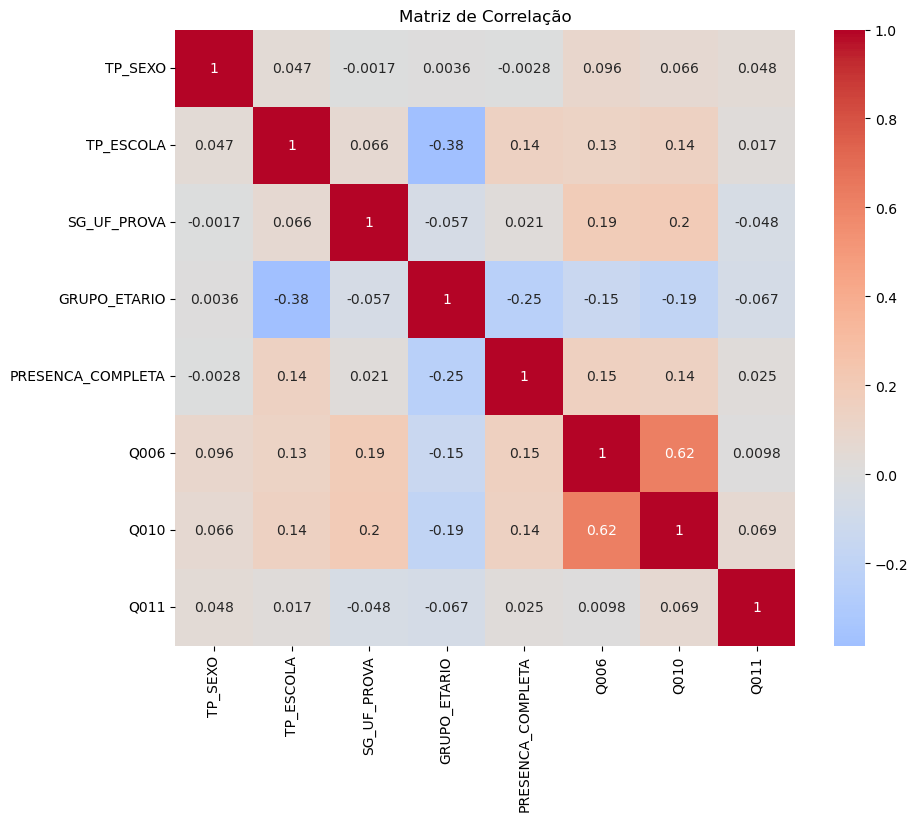

In [7]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

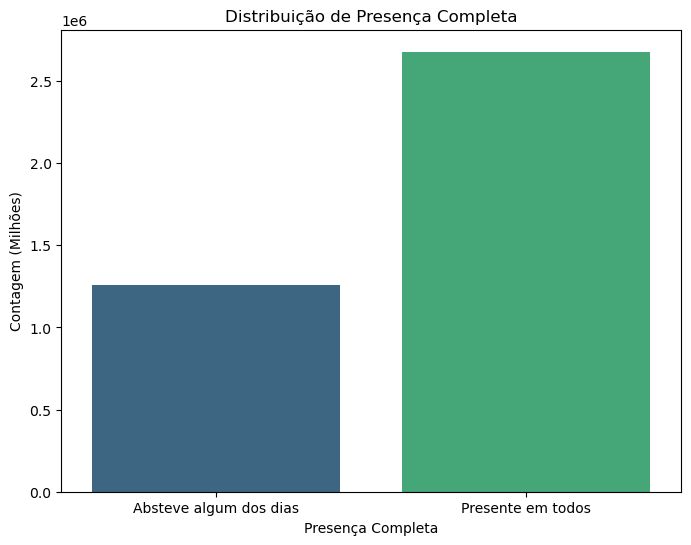

In [8]:
# Gráfico de barras para a presença completa
plt.figure(figsize=(8, 6))
sns.countplot(x='PRESENCA_COMPLETA', data=enemData, palette='viridis')
plt.title('Distribuição de Presença Completa')
plt.xlabel('Presença Completa')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0,1], labels=['Absteve algum dos dias', 'Presente em todos'])
plt.show()

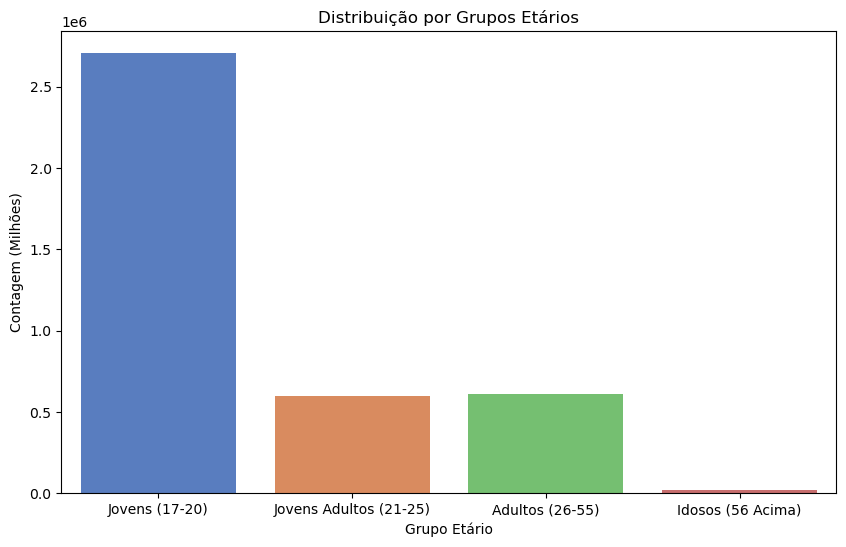

In [9]:
# Gráfico de distribuição de grupos etários
plt.figure(figsize=(10, 6))
sns.countplot(x='GRUPO_ETARIO', data=enemData, palette='muted')
plt.title('Distribuição por Grupos Etários')
plt.xlabel('Grupo Etário')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jovens (17-20)', 'Jovens Adultos (21-25)', 'Adultos (26-55)', 'Idosos (56 Acima)'])
plt.show()

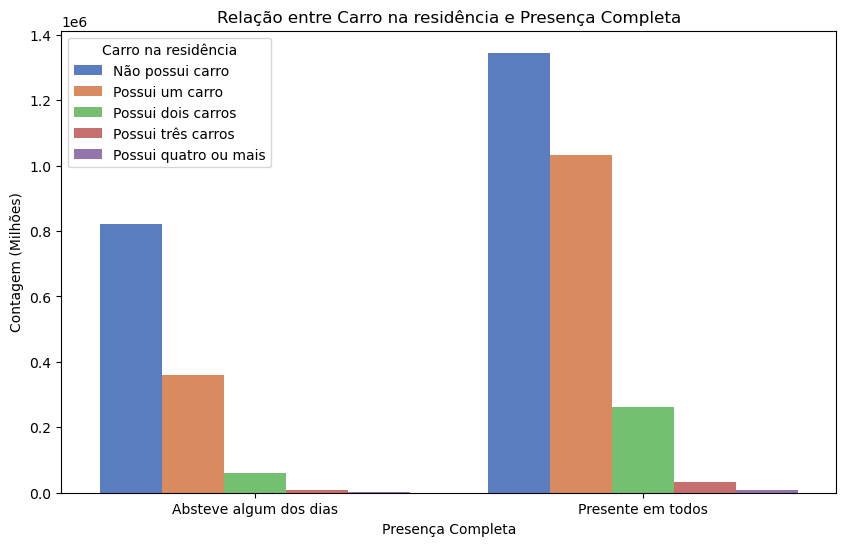

In [16]:
# Relação acesso internet e presença
plt.figure(figsize=(10, 6))
sns.countplot(x='PRESENCA_COMPLETA', hue='Q010', data=enemData, palette='muted')
plt.title('Relação entre Carro na residência e Presença Completa')
plt.xlabel('Presença Completa')
plt.ylabel('Contagem (Milhões)')
plt.legend(title='Carro na residência', loc='upper left', labels=['Não possui carro', 'Possui um carro', 'Possui dois carros', 'Possui três carros','Possui quatro ou mais'])
plt.xticks(ticks=[0,1], labels=['Absteve algum dos dias', 'Presente em todos'])
plt.show()

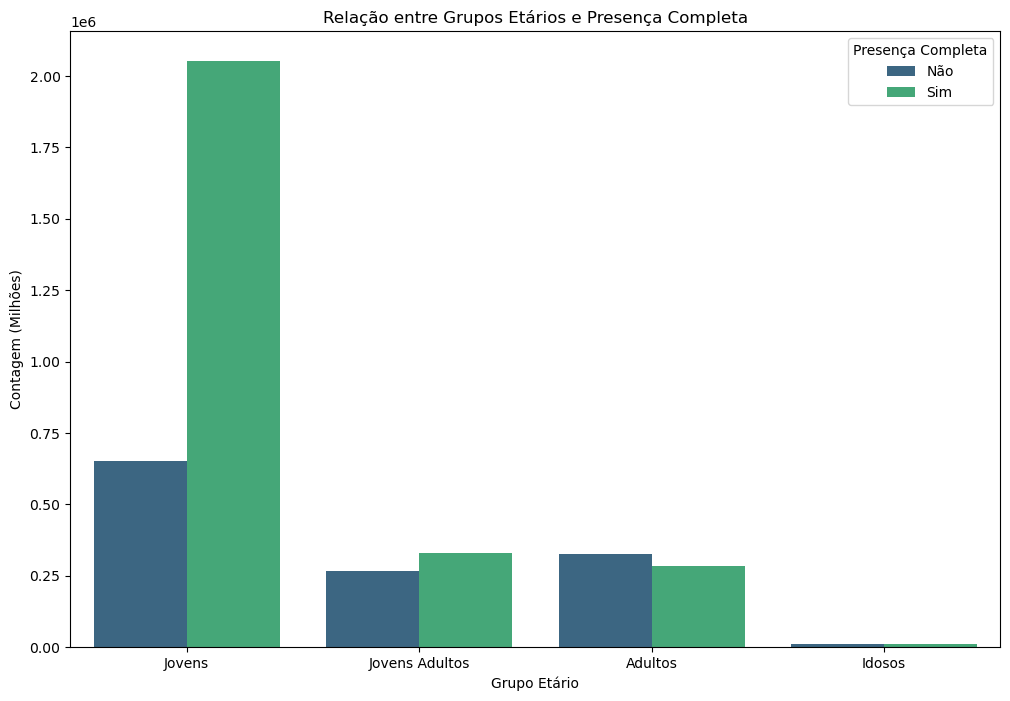

In [11]:
# Criando gráfico de presença por grupos etários
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='GRUPO_ETARIO', hue='PRESENCA_COMPLETA', data=enemData, palette='viridis')


plt.title('Relação entre Grupos Etários e Presença Completa')
plt.xlabel('Grupo Etário')
plt.ylabel('Contagem (Milhões)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jovens', 'Jovens Adultos', 'Adultos', 'Idosos'])
plt.legend(title='Presença Completa', loc='upper right', labels=['Não', 'Sim'])
plt.show()


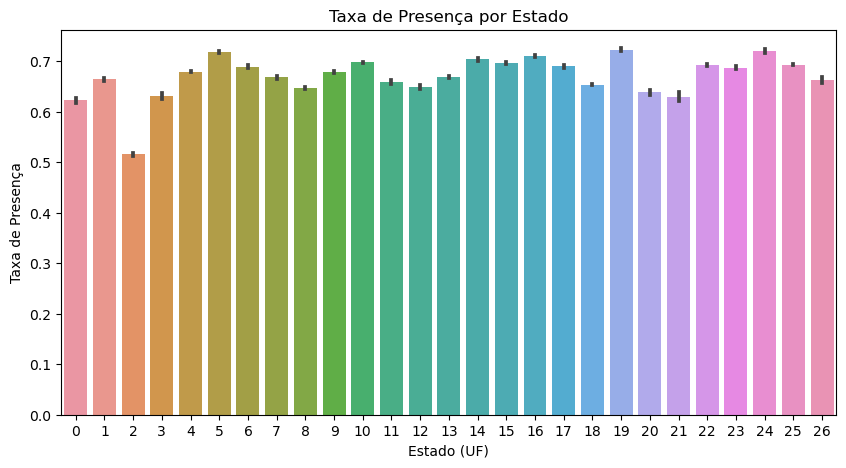

In [12]:
# Criando gráfico de presença por estado
plt.figure(figsize=(10,5))
sns.barplot(x='SG_UF_PROVA', y='PRESENCA_COMPLETA', data=enemData)
plt.xlabel('Estado (UF)')
plt.ylabel('Taxa de Presença')
plt.title('Taxa de Presença por Estado')
plt.show()

In [20]:
# Selecionando as features (variáveis independentes)
X = enemData.drop(['PRESENCA_COMPLETA'], axis=1)

# Selecionando o target (variável dependente)
y = enemData['PRESENCA_COMPLETA']

In [21]:
# Separando os dados em conjuntos de treinamento e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
# Criando função que irá avaliar os modelos
def avaliar_modelo(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Calculando métricas de avaliação
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    revocacao = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Exibindo as métricas
    print(f"Acurácia: {acuracia:.2f}")
    print(f"Precisão: {precisao:.2f}")
    print(f"Revocação: {revocacao:.2f}")
    print(f"F1-score: {f1:.2f}")

In [24]:
# Treinando e avaliando Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
print("Logistic Regression:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)


# Treinando e avaliando Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
print("\nDecision Tree:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)

# Treinando e avaliando Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
print("\nRandom Forest:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)

# Treinando e avaliando Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
print("\nPerceptron:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)

# Treinando e avaliando K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print("\nK-Nearest Neighbors:")
avaliar_modelo(clf, X_train, X_test, y_train, y_test)


Logistic Regression:
Acurácia: 0.69
Precisão: 0.71
Revocação: 0.91
F1-score: 0.80

Decision Tree:
Acurácia: 0.69
Precisão: 0.72
Revocação: 0.89
F1-score: 0.80

Random Forest:
Acurácia: 0.70
Precisão: 0.72
Revocação: 0.92
F1-score: 0.80
Perceptron:
Acurácia: 0.63
Precisão: 0.75
Revocação: 0.69
F1-score: 0.72

K-Nearest Neighbors:
Acurácia: 0.64
Precisão: 0.72
Revocação: 0.76
F1-score: 0.74
